In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

## Exercise 1
Create some training data:

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

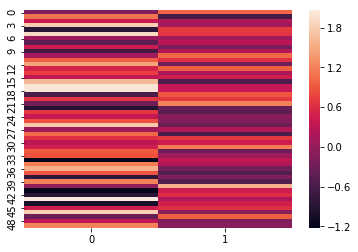

In [3]:
sns.heatmap(X)
plt.show()

In [4]:
'''to visually see if there's any correlation'''
#X.sort(axis=0)
#sns.heatmap(X)
#plt.show()

"to visually see if there's any correlation"

## Exercise 2
Create a scatterplot of the data, color by y (the plt.scatter() function does a good job plotting NumPy arrays).

In [5]:
def plot(X, y):
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

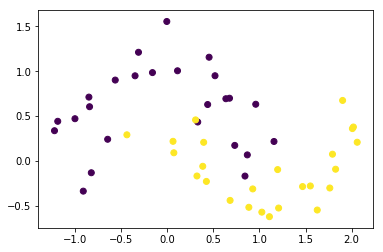

In [6]:
plot(X, y)

## Exercise 3
Implement a sigmoid function that accepts NumPy arrays:

In [7]:
def sigmoid(x):
    '''sigmoid function that accepts NumPy arrays'''
    return 1.0 / (1.0 + np.e ** -x)

## Exercise 4
Implement a function that calculates the derivative of the sigmoid function:

## Exercise 5
Use Numpy to add an extra column for the bias to your input:

In [8]:
#Stack arrays in sequence horizontally (column wise).
X = np.hstack([X, np.ones((X.shape[0], 1))])

In [9]:
X.shape

(50, 3)

## Exercise 6
Create the weights of the network of the form:

In [10]:
def get_weights():
    weights = [
               np.random.normal(3, 2),  # two neurons in the first layer
               np.random.normal(3, 1),  # neuron in the second layer
    ]
    return weights

## Exercise 7
Implement the feed-forward function.

In [11]:
def feed_forward(X, weights):
    """
    1. calculate the dot product of X            # shape of X is (N, 3)
       and the weights of the first layer        # weights (2, 3) --> expected (N, 2)
    2. apply the sigmoid function on the result  # (N, 2)
    3. append an extra 1 for the bias 
        to the result (see Ex.7)                 # (N, 3)
    4. calculate the dot product of X       
        and the weights of the second layer      # (1, 3) --> (N, 1)
    5. apply the sigmoid function on the result  # (N, 1) return this
    6. return all intermediate results
    """
    
    d1 = np.dot(X, weights[0]) # step 1.
    output1 = sigmoid(d1)      # step 2.
    input2 = np.hstack([output1, np.ones((output1.shape[0], 1))])
    d2 = np.dot(input2, weights[1])
    output2 = sigmoid(d2)
    return output1, output2

In [12]:
#out1, out2 = feed_forward(X, weights)

In [13]:
#out1.shape , out2.shape

In [14]:
#weights

In [15]:
#out1, ypred = feed_forward(X, weights)

In [16]:
def accuracy(ytrue, ypred):
    ypred = ypred.round().flatten().astype(np.int64)
    return sum(ypred ==ytrue) / y.shape[0]

In [17]:
#accuracy(y, out2)

## Exercise 8
Implement a log-loss function:

In [18]:
def loss(ytrue, ypred):
    loss = -(ytrue * np.log(ypred) + (1 - ytrue) * np.log(1 - ypred))

In [19]:
if __name__ == '__main__':
    acc = 0.0
    while acc < 0.90:
        weights = get_weights()
        out1, out2 = feed_forward(X, weights)
        acc = accuracy(y, out2)
        vloss = loss(y, out2.flatten())
        print("accuracy: ", acc, "loss:", vloss)

/home/manohar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: 'bool' object is not iterable

# Separable test code

In [ ]:
import numpy as np
from neural_network import sigmoid, feed_forward
from neural_network import X, weights

In [ ]:
#test for the weights
assert weights[0].shape == (3, 2)
assert weights[1].shape == (3, 1)

In [ ]:
# test for sigmoid function
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

In [ ]:
# test for the feed-forward step
out1, out2 = feed_forward(X, weights)
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)


# test for the feed-forward step with values that give a known result
Xref = np.array([[1.0, 2.0, 1.0]])
wref = [np.array([[1.0, -1.0],
                  [2.0, -2.0],
                  [0.0, 0.0]
                    ]),
           np.array([[1.0], [-1.0], [0.5]])
          ]
out1, out2 = feed_forward(Xref, wref)
assert np.all(out1.round(2) == np.array([[0.99, 0.01]]))
assert np.all(out2.round(2) == np.array([[0.82]]))

In [ ]:
# test the log-loss function
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(loss(ytrue, ypred).round(2) == expected)